In [1]:
from keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.
c:\users\a30\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\a30\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\a30\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


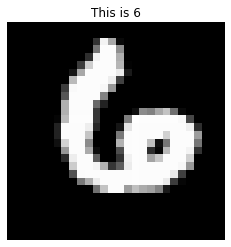

In [3]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
idx = random.randint(0, 59999)
plt.title("This is {}".format(y_train[idx]))
plt.axis("off")
plt.imshow(x_train[idx], cmap="gray")

In [9]:
# keras: 建立模型兩種方式 Sequential(層疊式) Model(?)
from keras.models import Sequential
# Dense: 全連接層
from keras.layers import Dense
model = Sequential()
# 784 * 128(全連接) + 128(bias) = 100480
model.add(Dense(128, activation="relu", input_dim=784))
# 128 * 10(全連接) + 10(bias) = 1290
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
# loss: 跟正確答案的距離
# oprimizer: 梯度下降的優化器
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [11]:
from keras.utils.np_utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
# batch_size: 看多少筆資料再平均做一次調整, 100~200(建議), 5~20(大圖片)
# epochs: 整份訓練資料到底要看過幾遍(控制模型什麼時候該訓練完成)
# validation_split:(train_test_split)切分多少測試資料出來
# verbose: (log要有多少程度) 1(預設):會有進度條 2: 必要資訊  0: 安靜
# 1 epoch: 多少次梯度下降 54000 / 200 = 270(次)
model.fit(x_train_norm, y_train_cat,
          batch_size=200,
          epochs=15,
          validation_split=0.1,
          verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 1s - loss: 0.0405 - accuracy: 0.9889 - val_loss: 0.0755 - val_accuracy: 0.9792
Epoch 2/5
 - 1s - loss: 0.0355 - accuracy: 0.9906 - val_loss: 0.0794 - val_accuracy: 0.9783
Epoch 3/5
 - 1s - loss: 0.0311 - accuracy: 0.9923 - val_loss: 0.0715 - val_accuracy: 0.9805
Epoch 4/5
 - 1s - loss: 0.0267 - accuracy: 0.9936 - val_loss: 0.0722 - val_accuracy: 0.9800
Epoch 5/5
 - 1s - loss: 0.0236 - accuracy: 0.9945 - val_loss: 0.0738 - val_accuracy: 0.9813


In [14]:
# 先做個loss, accuracy
model.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 20us/step


[0.07939983866913244, 0.9775000214576721]

In [35]:
# confusion matrix
# sklearn: predict_proba, predict
# keras: predict, predict_classes
# 如果你要對list裡面所有東西做轉換: list(map(lambda x:x**2, [1, 2, 3]))
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
i = ["{}(正確)".format(i) for i in range(10)]
c = ["{}(預測)".format(i) for i in range(10)]
mat = confusion_matrix(y_test, pre)
convert = []
for row in mat:
    r = np.array(row) / sum(row) * 100
    r = list(map(lambda x:"{}%".format(round(x, 2)), r))
    convert.append(r)
pd.DataFrame(convert,
             index=i,
             columns=c)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),98.88%,0.0%,0.2%,0.2%,0.1%,0.1%,0.2%,0.1%,0.2%,0.0%
1(正確),0.0%,98.68%,0.35%,0.18%,0.0%,0.0%,0.18%,0.18%,0.44%,0.0%
2(正確),0.48%,0.0%,97.67%,0.1%,0.39%,0.0%,0.29%,0.58%,0.48%,0.0%
3(正確),0.1%,0.0%,0.1%,98.42%,0.0%,0.2%,0.1%,0.59%,0.4%,0.1%
4(正確),0.1%,0.0%,0.0%,0.1%,98.68%,0.0%,0.41%,0.1%,0.2%,0.41%
5(正確),0.22%,0.0%,0.0%,1.01%,0.11%,97.31%,0.67%,0.11%,0.45%,0.11%
6(正確),0.94%,0.21%,0.31%,0.1%,0.21%,0.63%,97.49%,0.0%,0.1%,0.0%
7(正確),0.19%,0.19%,0.58%,0.1%,0.19%,0.0%,0.0%,97.96%,0.19%,0.58%
8(正確),0.72%,0.1%,0.51%,0.72%,0.41%,0.0%,0.21%,0.31%,96.61%,0.41%
9(正確),0.3%,0.4%,0.2%,0.69%,1.78%,0.2%,0.0%,0.69%,0.1%,95.64%


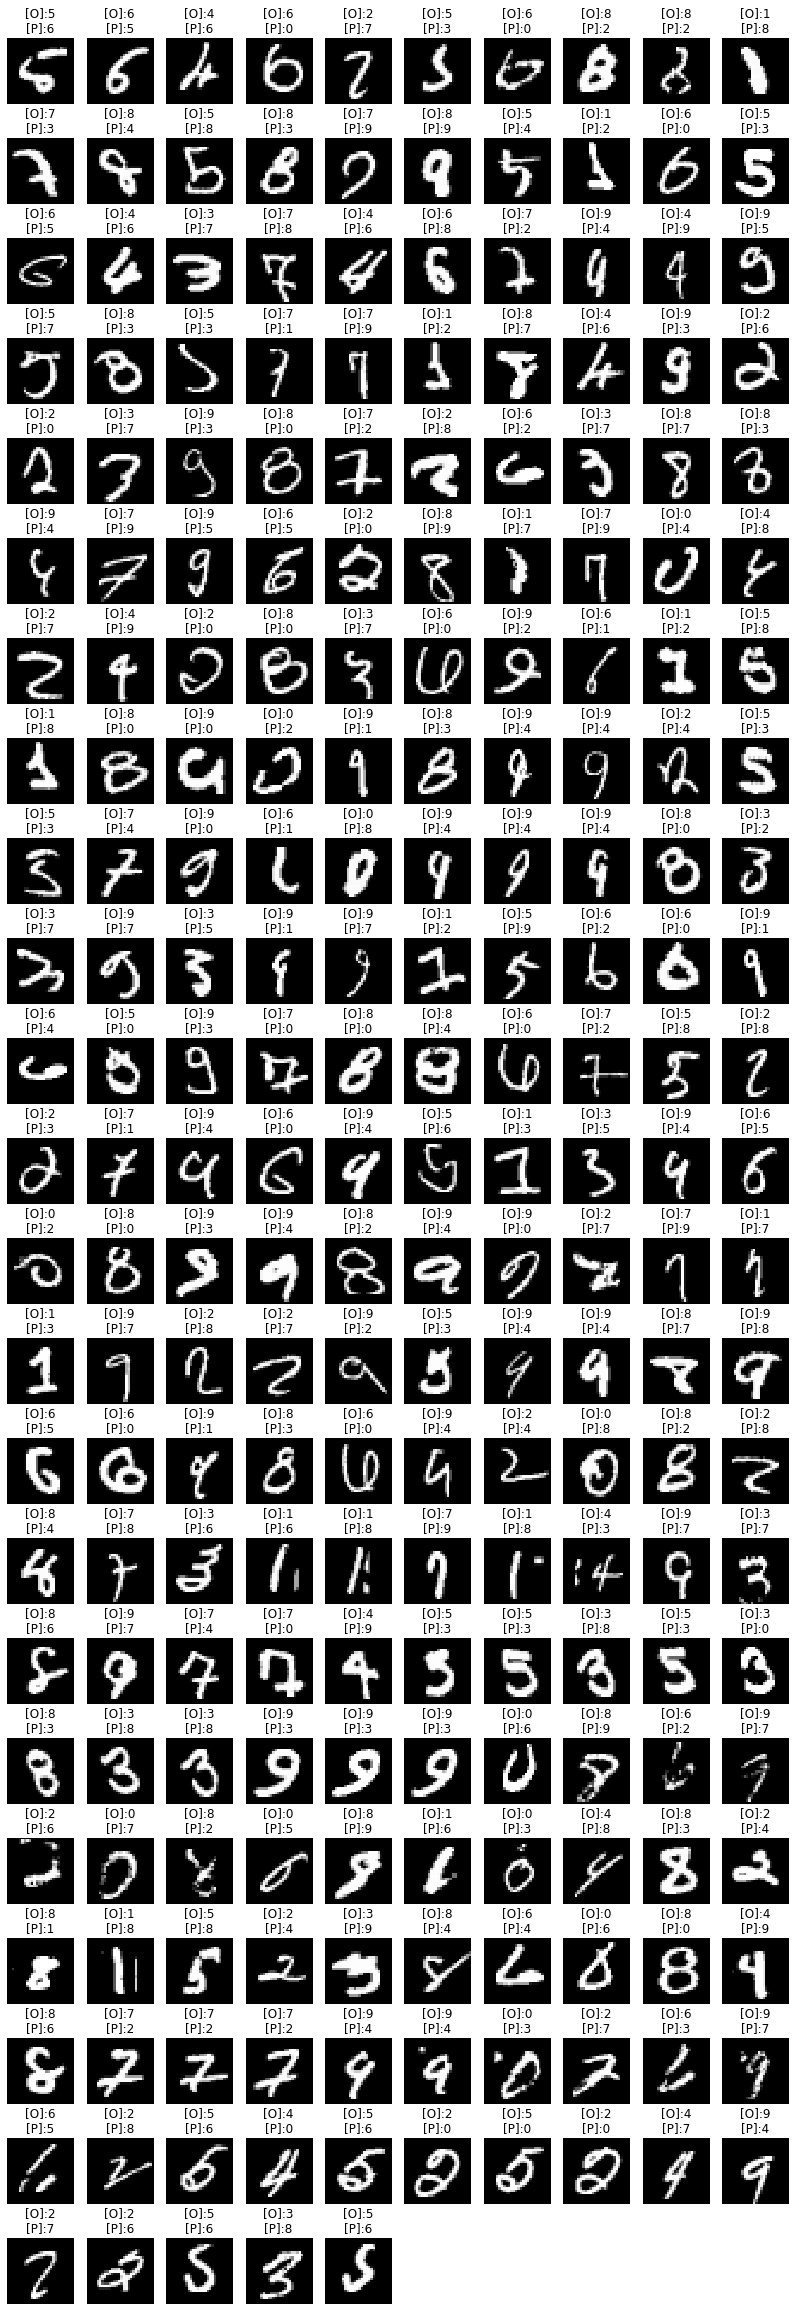

In [44]:
# np: !=來比較每個位置的相等
# nonzero: 找到所有不為0的位置
# [類似list] -> 把所有東西一次拿給你
idx = np.nonzero(pre != y_test)[0]

false_label = y_test[idx]
false_pre = pre[idx]
false_img = x_test[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42))

false_collection = zip(false_label, false_pre, false_img)
# 得到每一個: (index, (false_label, pre, img))
for i, (l, p, img) in enumerate(false_collection):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(l, p)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

請輸入檔案位址:test4.png
機率最高的: 8
是 8 的機率: 0.751673
是 3 的機率: 0.23954085
是 2 的機率: 0.0077998433
是 6 的機率: 0.00043508512
是 5 的機率: 0.00021988344
是 0 的機率: 0.000108401015
是 4 的機率: 0.00010753333
是 9 的機率: 9.691766e-05
是 7 的機率: 1.7562623e-05
是 1 的機率: 8.8959035e-07


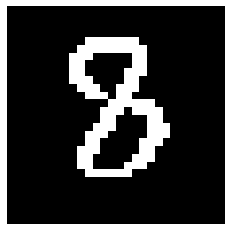

In [66]:
# sorted([("Amy", 5), ("Carol", 4), ("Bob", 3)],
#       key=lambda t:t[1])
from keras.preprocessing.image import load_img
fp = input("請輸入檔案位址:")
img = load_img(fp, target_size=(28, 28)).convert("L")
img_np = np.array(img).reshape(-1, 784) / 255
ans = model.predict_classes(img_np)[0]
print("機率最高的:", ans)
pre = model.predict(img_np)[0]
z = zip(list(range(10)), pre)
for i, p in sorted(z, key=lambda x:x[1], reverse=True):
    print("是", i, "的機率:", p)
plt.axis("off")
plt.imshow(img, cmap="gray")

In [67]:
# 如果你想看: https://support.hdfgroup.org/products/java/release/download.html
model.save("mlp.h5")

In [68]:
# 讀取: predict直接使用
# fit不需要compile
from keras.models import load_model
loaded = load_model("mlp.h5")
loaded.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 22us/step


[0.07939983866913244, 0.9775000214576721]